**Classification assignment**

1. read iris.csv dataset (it is a dataset with three classes of iris flowers) 
2. The dataset contains four features - you should use 2 features
3. Divide you data to train and test  - you can use ready libraries or you can split by yourself. Train data - 70%, test data - 30%
4. realize knn or svm classifier
5. visualize 

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 



In [63]:
iris = pd.read_csv("Iris.csv")
iris.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [60]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sepal Length in Cm  150 non-null    float64
 1   Sepal Width in Cm   150 non-null    float64
 2   Petal Length in Cm  150 non-null    float64
 3   PetalWidthCm        150 non-null    float64
 4   Species             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [61]:
iris.describe()

,Sepal Length in Cm,Sepal Width in Cm,Petal Length in Cm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [23]:
iris['Species'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [24]:
iris.isnull().values.any()

False

In [25]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 5)
(30, 5)
(120,)
(30,)


In [55]:
X_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
93,94,5.0,2.3,3.3,1.0
92,93,5.8,2.6,4.0,1.2
120,121,6.9,3.2,5.7,2.3
48,49,5.3,3.7,1.5,0.2
104,105,6.5,3.0,5.8,2.2
...,...,...,...,...,...
11,12,4.8,3.4,1.6,0.2
70,71,5.9,3.2,4.8,1.8
99,100,5.7,2.8,4.1,1.3
55,56,5.7,2.8,4.5,1.3


In [56]:
y_train

93     1
92     1
120    2
48     0
104    2
      ..
11     0
70     1
99     1
55     1
38     0
Name: Species, Length: 120, dtype: int32

In [80]:
sum_data = iris["SepalLengthCm"].sum()
mean_data = iris["SepalLengthCm"].mean()
median_data = iris["SepalLengthCm"].median()
  
print("Sum:",sum_data, "\nMean:", mean_data, "\nMedian:",median_data)

Sum: 876.5 
Mean: 5.843333333333334 
Median: 5.8


In [81]:
min_data=iris["SepalLengthCm"].min()
max_data=iris["SepalLengthCm"].max()
  
print("Minimum:",min_data, "\nMaximum:", max_data)

Minimum: 4.3 
Maximum: 7.9


<AxesSubplot: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

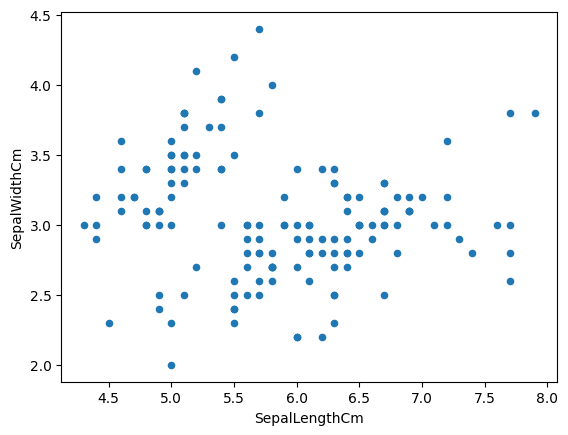

In [29]:
iris.plot(kind='scatter', x= 'SepalLengthCm', y='SepalWidthCm')

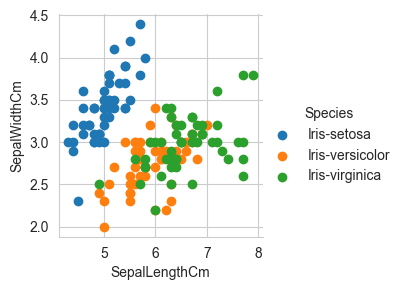

In [31]:
sns.set_style('whitegrid')
sns.FacetGrid(iris, hue='Species').map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()

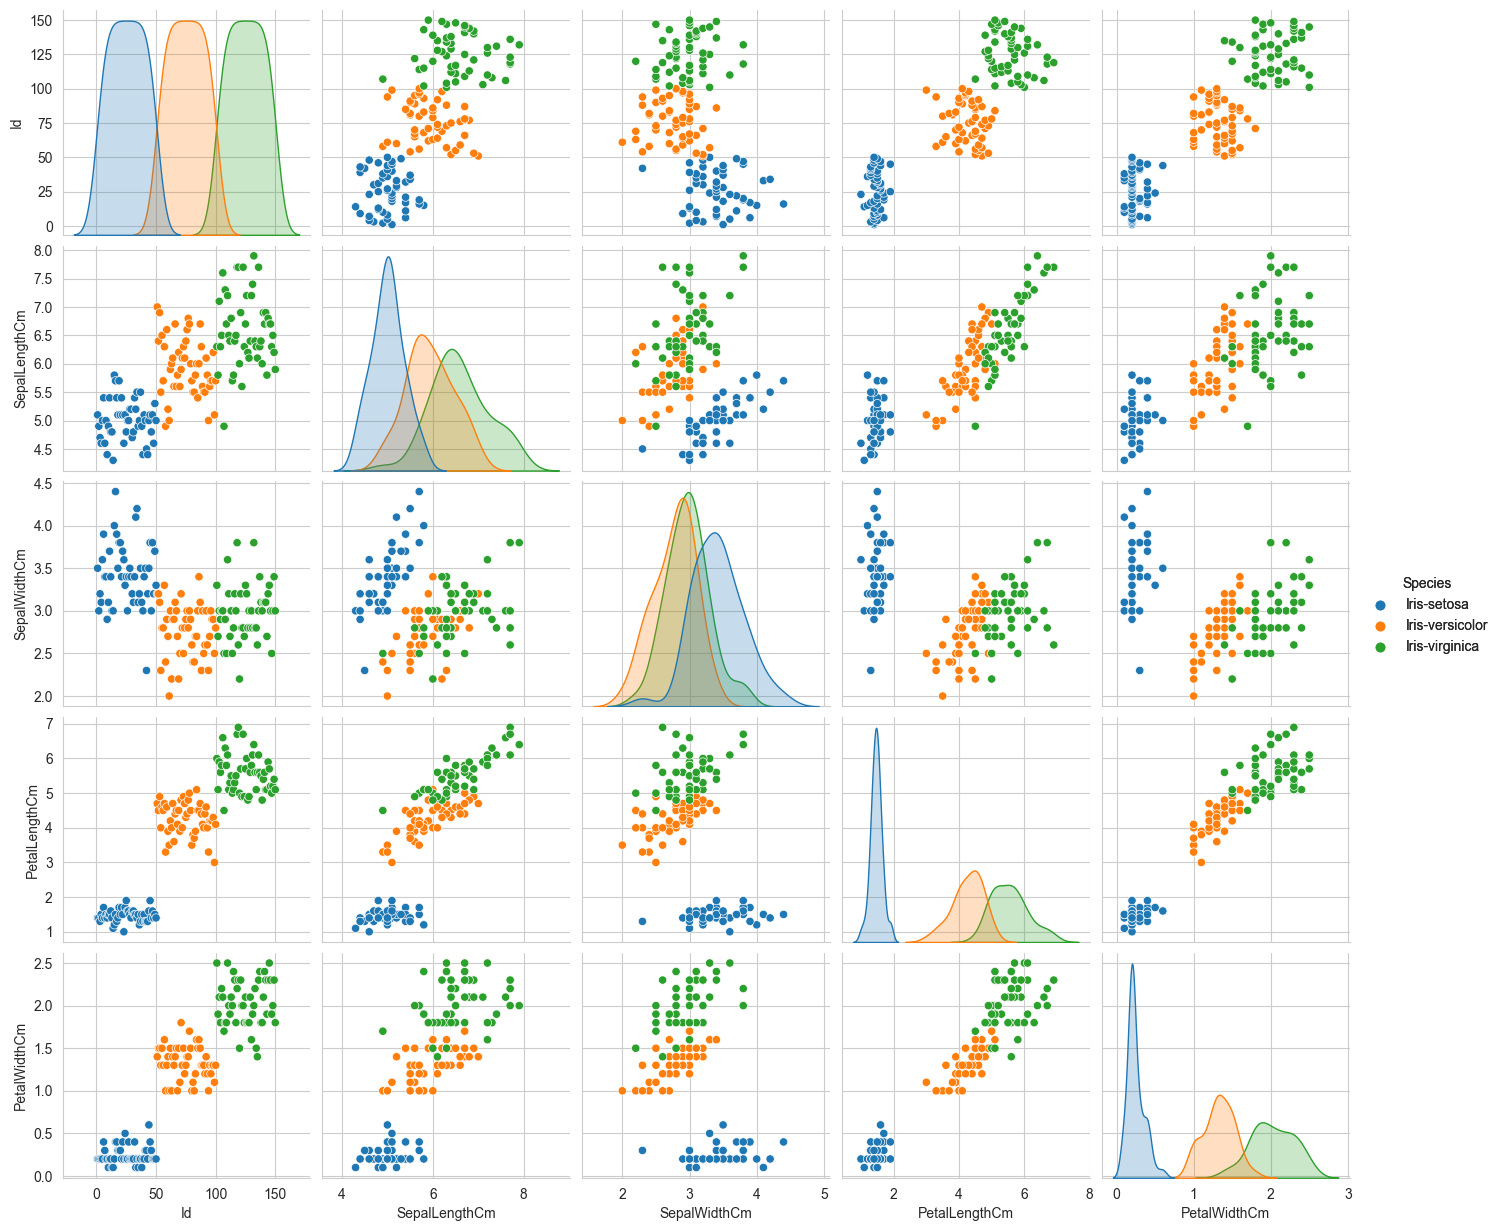

In [32]:
sns.pairplot(iris, hue='Species').add_legend()

<function matplotlib.pyplot.show(close=None, block=None)>

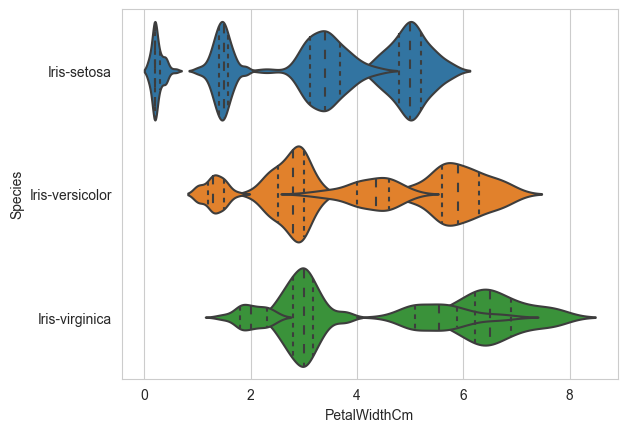

In [79]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data = iris, inner='quartile')
plt.show
g = sns.violinplot(y='Species', x='SepalWidthCm', data = iris, inner='quartile')
plt.show
g = sns.violinplot(y='Species', x='PetalLengthCm', data = iris, inner='quartile')
plt.show
g = sns.violinplot(y='Species', x='PetalWidthCm', data = iris, inner='quartile')
plt.show

In [34]:
for column in iris.columns:
    if iris[column].dtype == np.number:
        continue
iris[column] = LabelEncoder().fit_transform(iris[column])

C:\Users\Beksultan\AppData\Local\Temp\ipykernel_9304\2237330160.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if iris[column].dtype == np.number:


In [36]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

In [38]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [39]:
X = iris.drop(['Species'], axis=1)
y= iris['Species']

In [40]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
k_range = list(range(1,12))
a = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    a.append(metrics.accuracy_score(y_test, y_pred))

In [50]:
a

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [51]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [52]:
metrics.accuracy_score(y_test, y_pred)

1.0

In [57]:
iris.drop('Id', inplace=True, axis=1)

In [90]:
iris.rename(columns = {'SepalLengthCm':'Sepal Length in Cm', 'SepalWidthCm':'Sepal Width in Cm',
                              'PetalLengthCm':'Petal Length in Cm'}, inplace = True)
print(iris.columns)   

Index(['Id', 'Sepal Length in Cm', 'Sepal Width in Cm', 'Petal Length in Cm',
       'PetalWidthCm', 'Species', 'total_values', 'Total Values'],
      dtype='object')


In [64]:
iris.shape

(150, 6)

In [65]:
iris.values

array([[1, 5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [2, 4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [3, 4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4, 4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5, 5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [6, 5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [7, 4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [8, 5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [9, 4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [10, 4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [11, 5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [12, 4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [13, 4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [14, 4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [15, 5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [16, 5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [17, 5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [18, 5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [19, 5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [20, 5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [21, 5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
 

In [66]:
iris.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [70]:
X=iris.iloc[:, :4]
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4


In [69]:
y=iris.iloc[:, -1]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [72]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit_transform(X)
X[0:4]

array([[-1.72054204, -0.90068117,  1.03205722, -1.3412724 ],
       [-1.69744751, -1.14301691, -0.1249576 , -1.3412724 ],
       [-1.67435299, -1.38535265,  0.33784833, -1.39813811],
       [-1.65125846, -1.50652052,  0.10644536, -1.2844067 ]])

In [73]:
prediction_output=pd.DataFrame(data=[y_test.values, y_pred], index=['y_test', "y_pred"])

In [74]:
prediction_output.transpose()

,y_test,y_pred
0,1,0
1,2,0
2,2,1
3,1,1
4,1,1
5,1,1
6,1,2
7,1,1
8,2,1
9,2,2


In [89]:
cols = iris.columns
print(cols)
cols = cols[1:5]
tt = iris[cols]
iris["Total Values"]=tt[cols].sum(axis=1)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'total_values', 'Total Values'],
      dtype='object')


In [97]:
iris.isnull()

,Id,Sepal Length in Cm,Sepal Width in Cm,Petal Length in Cm,PetalWidthCm,Species,Total Values
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
145,False,False,False,False,False,False,False
146,False,False,False,False,False,False,False
147,False,False,False,False,False,False,False
148,False,False,False,False,False,False,False


In [93]:
iris.head()

,Id,Sepal Length in Cm,Sepal Width in Cm,Petal Length in Cm,PetalWidthCm,Species,Total Values
0,1,5.1,3.5,1.4,0.2,Iris-setosa,10.2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,9.5
2,3,4.7,3.2,1.3,0.2,Iris-setosa,9.4
3,4,4.6,3.1,1.5,0.2,Iris-setosa,9.4
4,5,5.0,3.6,1.4,0.2,Iris-setosa,10.2
